# Insights and Predictors of Academic Success

### Project Objective
This project was created with the objective of understanding the factors that influence student academic performance and is critical for improving educational outcomes. This project explores how demographic, behavioral, and socioeconomic variables correlate with student success in math, reading, and writing..

### Research Questions:
1. What factors most influence academic performance
2.  Can we predict a students performance tier (Low, Average, High)?
### Dataset Overviewi
The dataset used in this project contains numerical and categorical features that describe family demographics, socioeconomic status, and student math, reading, and writing test scores. It consists of 1000 rows, 8 columns and was downloaded from Kaggle [here](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams).

Key features from the dataset include gender, race/ethnicity, parental level of education, lunch (if the student was apart of a reduced lunch price program), test prepaartion course (if the student completed), and math, reading, and writing scores. The target variable, performance_category, was created as a way to assess a students overall performance across math, reading, and writing categories


# Reading and Displaying Data

In [3]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [4]:
!kaggle datasets download -d "spscientist/students-performance-in-exams"

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile

In [6]:
#importing
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('students-performance-in-exams/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Dataset Description

gender: Gender of student

race/ethnicity: Race of student

parental_level_of_education: Highest education level of parents

lunch: Free and reduced lunch program

math_score: Student math score

reading_score: Student reading score

writing_score: Student writing score

# Exploratory Data Analysis (EDA)

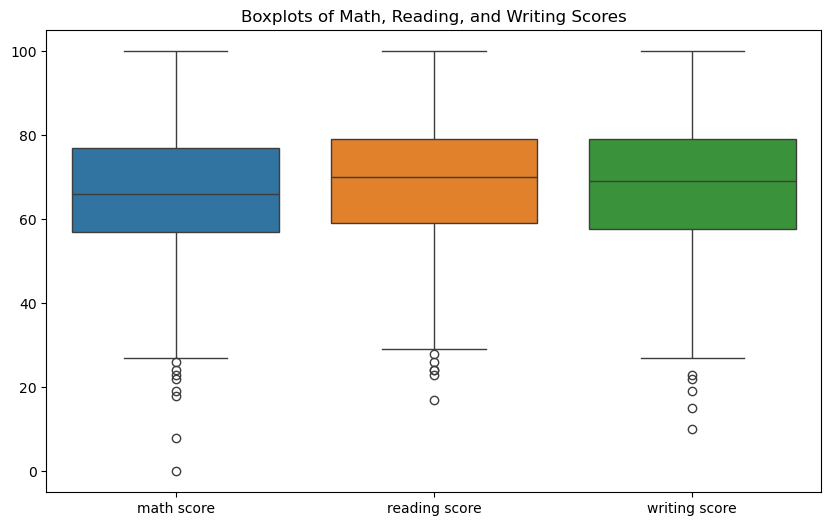

In [10]:
# Boxplots for scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['math score', 'reading score', 'writing score']])
plt.title("Boxplots of Math, Reading, and Writing Scores")
plt.show()

### Test Score Boxplots
The boxplots indicate that many outliers exist but primarily on the lower side of the data.

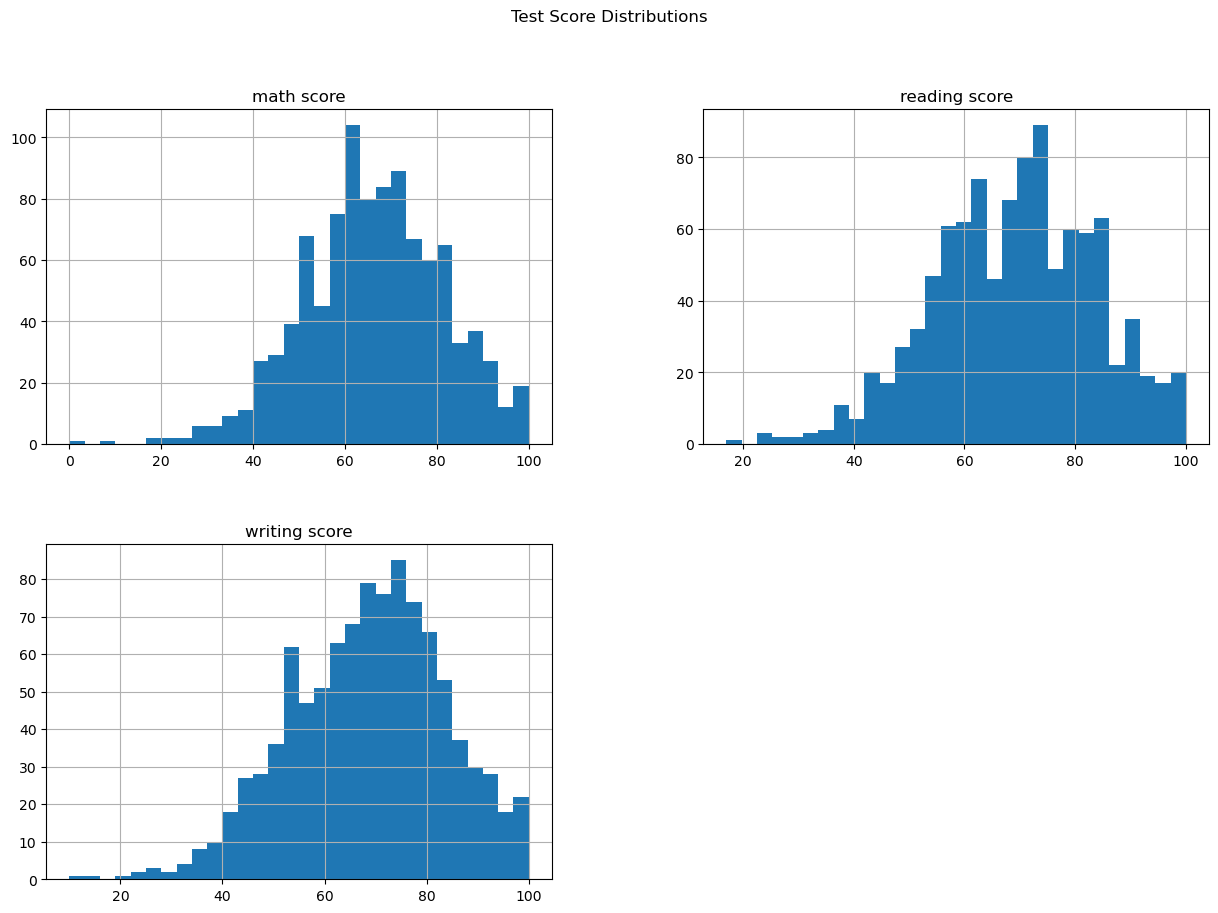

In [12]:
test_scores =  data[['math score', 'reading score', 'writing score']]

test_scores.hist(bins=30, figsize=(15, 10))
plt.suptitle('Test Score Distributions')
plt.show()

### Test Score Distributions
Test scores follow a relatively normal distribution with a slight left-skew. This reinforces the data shown on the from the boxplots that there are outliers on the lower side of the data.


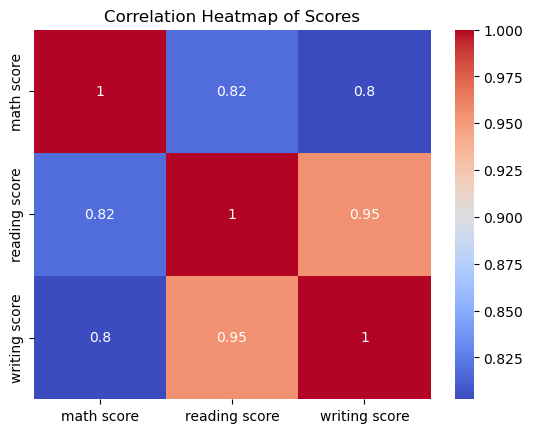

In [14]:
# Correlation heatmap
sns.heatmap(data[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Scores")
plt.show()

### Correlation Analysis
Math and Reading: Correlation is 0.82 (strong positive). Students who score well in math tend to also score well in reading.

Reading and Writing: Correlation is 0.95 (very strong positive). This suggests a very tight relationship between reading and writing abilities.

---

# Data Preprocessing

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
#checking for duplicates
print(data.duplicated().sum())

0


In [20]:
#getting unique values for categorical columns
print(data['gender'].unique())
print(data['race/ethnicity'].unique())
print(data['parental level of education'].unique())
print(data['lunch'].unique())
print(data['test preparation course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [21]:
#Encoding binary variables (gender, lunch, test prep)
data['gender'] = data['gender'].map({'female': 0, 'male': 1})
data['lunch'] = data['lunch'].map({'standard': 1, 'free/reduced': 0})
data['test preparation course'] = data['test preparation course'].map({'none': 0, 'completed': 1})

### Encoding Variables
Gender, lunch, and test preparation course were all encoded into binary variables so that they can pass through our model. Lunch can be used as a proxy variable for Socioeconomic status since only low-income students will qualify for free/reduced lunches.

# Feature Engineering

In [24]:
# Creating composite average score feature
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

In [25]:
# Creating average score and lunch interaction feature
data['lunch_score_interaction'] = data['average_score'] * data['lunch']

### Objectives of Feature Engineering
1. Created an Average Composite Score to use as an Overall Performance Metric.
2. Used the Average Composite Score and Lunch Status to create an Interaction Term to identify if socioeconomic status affects test scores.

# Model Building

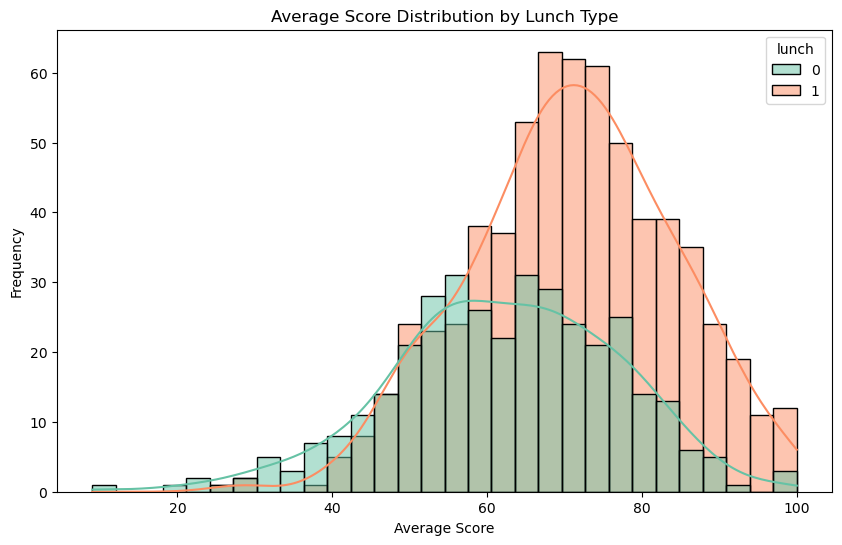

In [28]:
# Plot separate distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='average_score', hue='lunch', kde=True, bins=30, palette='Set2')
plt.title('Average Score Distribution by Lunch Type')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

### Reduce Lunch and Test Score Analysis
- Students with free/reduced lunch (lunch = 0) have a lower average test score distribution that is skewed towards the lower end (left-skewed).
- Students with standard lunch (lunch = 1) have a higher average score distribution.

In [30]:
# testing if difference between average test scores is significant

from scipy.stats import ttest_ind

lunch_0 = data[data['lunch'] == 0]['average_score']
lunch_1 = data[data['lunch'] == 1]['average_score']

t_stat, p_value = ttest_ind(lunch_0, lunch_1, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


T-statistic: -9.32, P-value: 0.0000


### Test of Signficance between Standard and Free/Reduced Lunch
The large negative t-statistic (-9.32) suggests that there is a strong difference between the means of the two groups. A p-value of 0.000 indicates that the difference is statistically significant and that the observed difference is not due to chance.

The result indicates that lunch type is a critical predictor of student achievement on test scores and should be included in the model. It also indicates that underlying socioeconomic factors impact student academic performance.

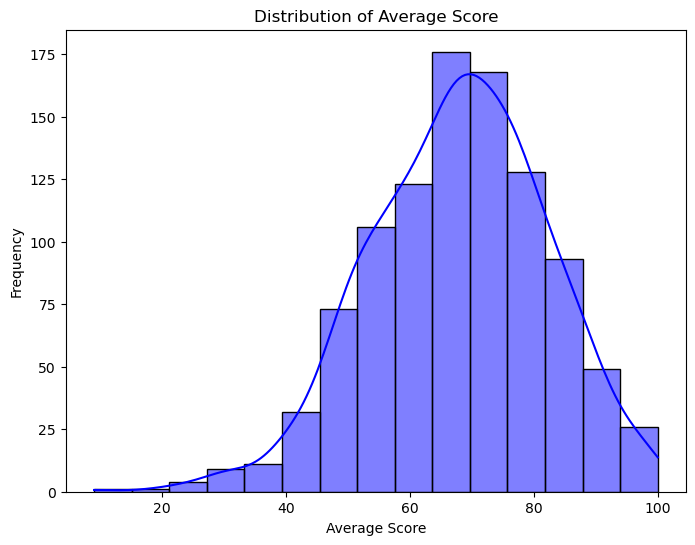

In [32]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['average_score'], kde=True, bins=15, color='blue')
plt.title('Distribution of Average Score')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

### Distribution of Average Score
The `average_score` column represents a student's overall academic performance across math, reading, and writing. The histogramabovew shows the distribution of these scores, helping us understand the range and central tendency of student performance
The scores are slightly skewed, indicating most students perform above average, but there is a small group of low-performing students.


In [34]:
# Define performance categories
def categorize_performance(score):
    if score >= 85:
        return 'High'
    elif score >= 60:
        return 'Average'
    else:
        return 'Low'

# Apply the function
data['performance_category'] = data['average_score'].apply(categorize_performance)

In [35]:
# Map lunch types to binary values
data['is_standard_lunch'] = data['lunch'].map({'standard': 1, 'free/reduced': 0})

In [36]:
#verifying columns have been created
print(data.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average_score', 'lunch_score_interaction',
       'performance_category', 'is_standard_lunch'],
      dtype='object')


---

### Creating a Model to Predict Performance Category
1. Create a model to predict student performance based on explanatory variables
2. Split the dataset into training and testing sets
3. Train and evaluate the model
4. Summarize the accuracy of the model and determine next steps

In [39]:
from sklearn.model_selection import train_test_split

# Select relevant features
features = [
    'math score', 
    'reading score', 
    'writing score', 
    'is_standard_lunch',
    ]
X = data[features]

# Define the target variable
y = data['performance_category']

# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the datasets
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (700, 4), Test Set: (300, 4)


In [40]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

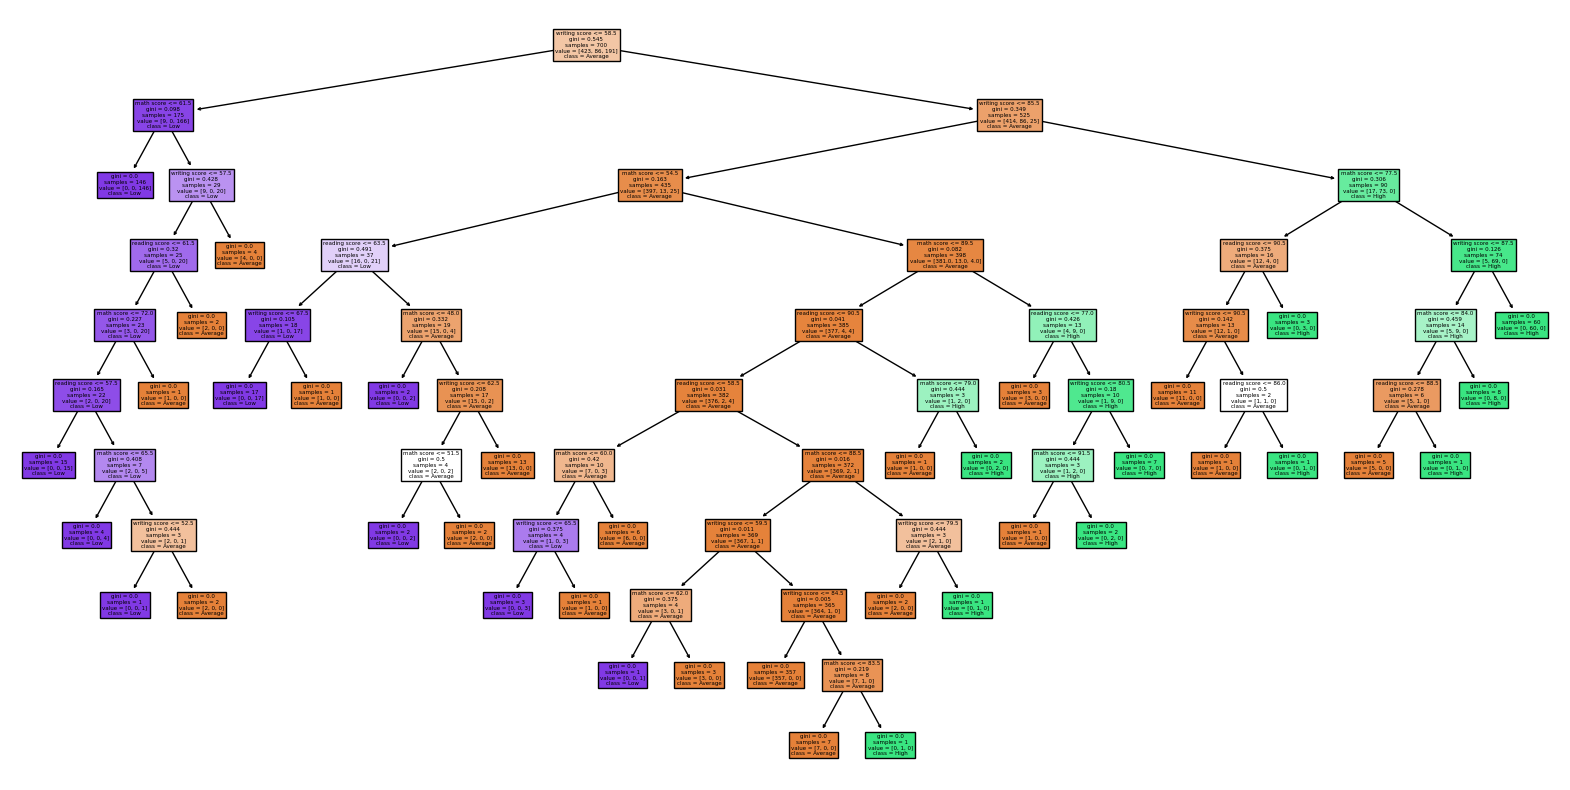

In [42]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=model.classes_, filled=True)
plt.show()

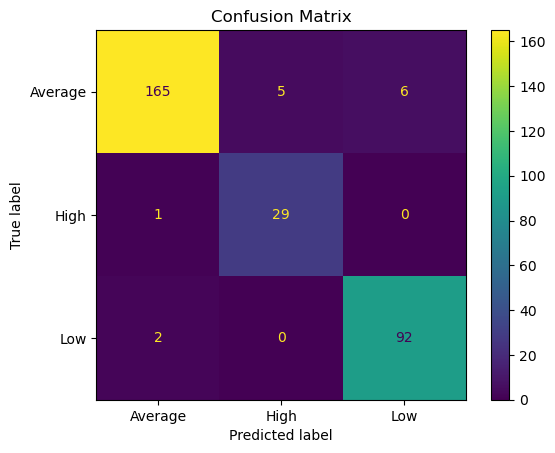

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

     Average       0.98      0.94      0.96       176
        High       0.85      0.97      0.91        30
         Low       0.94      0.98      0.96        94

    accuracy                           0.95       300
   macro avg       0.92      0.96      0.94       300
weighted avg       0.96      0.95      0.95       300



In [70]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=model.classes_)
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Results Summary
1. Model correctly predicts student performance 98% in the test set indicated a strong performance
2. The confusion matrix indicates that misclassifcations are minimal with most errors between average/high or average/low
3. The model proves that lunch type, and math, reading, and writing scores are signficant in predicting Student Performance 

# Conclusion
### Summary of Findings:
1. This project aimed to explore the factors influencing student academic performance and predict their performance tiers (Low, Average, High) based on demographic, socioeconomic, and behavioral features. Using a decision tree model, several important insights and predictive capabilities were uncovered.
2. Academic performance is strongly influenced by math, reading, and writing scores, which directly define a student's performance category.
3. Lunch type, a proxy for socioeconomic status, emerged as a significant predictor, with students on free/reduced lunch performing statistically worse than those on standard lunch programs.
4. These findings align with existing research, emphasizing the role of socioeconomic factors on academic skills in shaping student outcomes.

### Predictive Implications:
1. The decision tree model achieved a high accuracy of 95% in predicting student performance tiers, with robust performance across all achievement categories.
2. Educators or policymakers can use the model to classify students and allocate resources, such as targeted interventions for low-performing students or enrichment programs for high performers.